# Démonstration de l'usage de `transparent_correction`

In [1]:
import sys
sys.path.append('..')
import transparent_correction as tc

from IPython.core.display import HTML


## Étape manuelle 1: lire le gabarit

In [2]:
grader = tc.correction_parser(filename='demo_correction_template.xlsx', 
                              exam_name='Examen_final_GCHdemo_2021')

## Regarder ce qu'on a lu (mêmes tableaux que dans le gabarit)

In [3]:
# Les codes de correction pour chaque erreur / critère
grader.raw_codes

définition  points
    code                                                           
Q_1 sto   Erreur dans le calcul stoechiométrique du proc...     5.0
    dv    Mauvaise prise en compte de la durée de vie du...     6.0
    dv                                                  NaN     NaN
Q_2 rv                         Réponse correcte, mais vague     2.0
    oz      Confond couche d’ozone et gaz à effet de serre!     9.0
    bon   Points bonus pour une  explication particulièr...    -1.0

In [4]:
# Les codes de correction pour des erreurs applicables à toutes questions
grader.universal_codes

,définition,pénalités relatives,pénalités_absolues
code,,,
ek,"erreur kalcul, mais le concept est bon",NaN,0.25
eu,erreur d'unité,0.2,2.00
rm,réponse manquante (la question n'a pas été faite),1.0,NaN
pr,pas de réponse mais la démarche est présente,0.1,NaN
re,réponse erronnée (perte de tous les points),1.0,NaN
ec,erreur conceptuelle diverse,0.2,2.00
el,"erreur de lecture, mais raisonnement et démarc...",NaN,0.25


In [5]:
# Les codes de correction, pour chaque matricule étudiant, à chaque question
grader.raw_corr

,prénom,nom,courriel,Q_1,Q_2,Q_3
12345,Bill,Joie,joie.bill@gmail.com,"sto, dv",oz,ok
23456,John,Doe,guillaume.majeau-bettez@polymtl.ca,dv,rv,rm


## On calcule les notes

Cette étape:
- Applique les codes de correction universels (universal_codes) à chaque question et ajuste les pondération relatives
- Fait un "pivot table" (`correction_matrix`) à partir de `raw_corr`.
- Harmonise les dimensions et inspecte pour détecter les erreurs typiques
- Calcule les notes

In [6]:
# Le moment fatidique...
grader.calc_grades()

## On regarde les résultats

In [7]:
# Le pointage pour chaque question
grader.grades

questions,Q_1,Q_2,Q_3
12345,9.0,21.0,50.0
23456,14.0,28.0,0.0


In [8]:
# Le score relatif (en pourcentage) de chaque question
grader.grades_rel

questions,Q_1,Q_2,Q_3
12345,45.0,70.000000,100.0
23456,70.0,93.333333,0.0


In [9]:
# La note totale de chaque étudiant
grader.grades_total

,prénom,nom,courriel,points
12345,Bill,Joie,joie.bill@gmail.com,80.0
23456,John,Doe,guillaume.majeau-bettez@polymtl.ca,42.0


## Obtenir une vue d'ensemble pour la classe

L'histogramme a l'air un peu fou avec seulement deux étudiants, mais bon...

moyenne: 61.0 points
déviation standard: 26.9 points
valeur médiane: 61.0 points
Nombre total d'étudiants: 2
Nombre d'échecs: 1


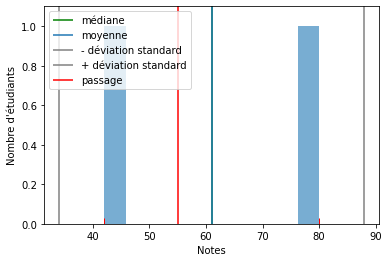

In [10]:
# Obtenir une vue d'ensemble pour la note totale
_ = grader.give_overview(fail=55)

moyenne: 57.5 points
déviation standard: 17.7 points
valeur médiane: 57.5 points
Nombre total d'étudiants: 2
Nombre d'échecs: 1


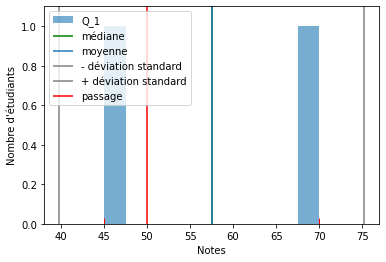

In [11]:
# Obtenir une vue d'ensemble pour la question 1, et sauver l'histogramme en pdf et svg
_ = grader.give_overview(q='Q_1', filename='/tmp/histogram_Q1')

In [12]:
%ls /tmp/histogram*

/tmp/histogram_Q1.pdf  /tmp/histogram_Q1.svg


## Archiver les résultats

On sauve le détail des correction dans fichier mis à jour (`Examen_final_GCHdemo_2021.xlsx`) et un permanent avec horodatage.

In [13]:
grader.archive_grades()

In [14]:
%ls *xlsx

demo_correction_template.xlsx
Examen_final_GCHdemo_2021_2021-12-27T23:13:40.027008.xlsx
Examen_final_GCHdemo_2021_2021-12-27T23:21:28.498114.xlsx
Examen_final_GCHdemo_2021_2021-12-28T00:05:15.455534.xlsx
Examen_final_GCHdemo_2021_2022-01-18T16:48:44.915312.xlsx
Examen_final_GCHdemo_2021_2022-03-29T14:20:39.444142.xlsx
Examen_final_GCHdemo_2021_2022-03-29T14:21:32.560557.xlsx
Examen_final_GCHdemo_2021_2022-03-29T14:27:08.987620.xlsx
Examen_final_GCHdemo_2021_2022-03-29T14:33:51.602655.xlsx
Examen_final_GCHdemo_2021_2022-03-29T14:36:34.416928.xlsx
Examen_final_GCHdemo_2021_2022-03-29T14:40:50.810905.xlsx
Examen_final_GCHdemo_2021.xlsx


## Étape manuelle 2: rédiger le message global accompagnant le détail des notes

In [20]:
grader.message['foreword'] = "La correction de l'examen fictif est enfin terminée. Le corrigé détaillé est disponible sur Moodle. \
Je vous encourage à bien réviser vos erreurs, car cet apprentissage est crucial en préparation à l'examen final."

grader.message['closing'] = """

Bon courage pour la suite.

cordialement,

Guillaume

"""

## Inspecter le courriel pour quelques étudiants

In [21]:
HTML(grader.compilation_message(student_id=12345))

## Envoyer les courriels inviduels

In [22]:
grader.send_results(sender='Guillaume Majeau-Bettez <guillaume.majeau-bettez@polymtl.ca>',
                    server='smtp.polymtl.ca',
                    bcc_recipients=['joie.bill@gmail.com', 'guillaume.majeau-bettez@polymtl.ca'])

Ready to send emails? [y/n]y
Insert your server login ID (e.g., p-matricule): ········
Insert your password for the email server: ········
Message sent to Bill Joie
Message sent to John Doe
Done sending messages!
